In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/adult-income-dataset/adult.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

df = pd.read_csv("/kaggle/input/adult-income-dataset/adult.csv")

In [9]:
def fix_get_dum(df):
    n_c = pd.get_dummies(df['native-country'])
    gender = pd.get_dummies(df['gender'])
    race = pd.get_dummies(df['race'])
    relationship = pd.get_dummies(df['relationship'])
    occupation = pd.get_dummies(df['occupation'])
    marital_status = pd.get_dummies(df['marital-status'])
    education = pd.get_dummies(df['education'])
    workclass = pd.get_dummies(df['workclass'])
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    return df

In [10]:
def fixed_occupation(occupation):
    check = 0
    for i in range(len(occupation)):
        if occupation[i] == '?':
            if check < 702:
                occupation[i] = 'Prof-specialty'
            elif check < 1404:
                occupation[i] = 'Craft-repair'
            elif check < 2106:
                occupation[i] = 'Exec-managerial'
            else:
                occupation[i] = 'Adm-clerical'
            check += 1
    return occupation

In [11]:
def preprocessing(df):
    income = [1 if i == '<=50K' else 0 for i in df['income']]
    df['income'] = income
    native_country = [i if i != '?' else 'United-States' for i in df['native-country']]
    df['native-country'] = native_country
    race = [i if i != 'Other' else 'White' for i in df['race']]
    df['race'] = race
    occupation = fixed_occupation(df.occupation.copy())
    df['occupation'] = occupation
    workclass = [i if i != '?' else 'Private' for i in df['workclass']]
    df['workclass'] = workclass
    return df

In [12]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
df = preprocessing(df)

In [14]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1


In [15]:
n_c = pd.get_dummies(df['native-country'])
gender = pd.get_dummies(df['gender'])
race = pd.get_dummies(df['race'])
relationship = pd.get_dummies(df['relationship'])
occupation = pd.get_dummies(df['occupation'])
marital_status = pd.get_dummies(df['marital-status'])
education = pd.get_dummies(df['education'])
workclass = pd.get_dummies(df['workclass'])

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f613ab285c0>,
      dtype=object)

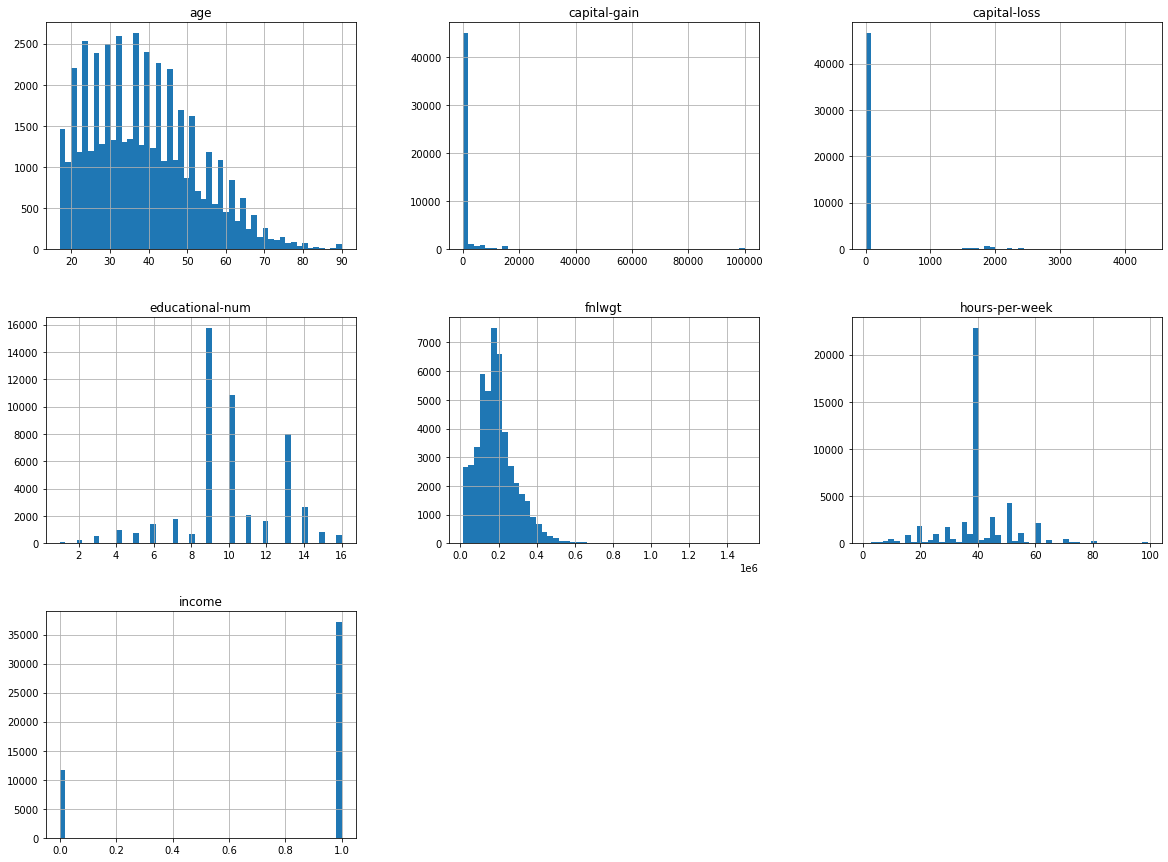

In [16]:
%matplotlib inline
df.hist(bins=50,figsize=(20,15))

In [17]:
df.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842.000000
unique,NaN,8,NaN,16,NaN,7,14,6,4,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,36705,NaN,15784,NaN,22379,6874,19716,42168,32650,NaN,NaN,NaN,44689,NaN
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,0.760718
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,0.426649
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,1.000000
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,1.000000
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,1.000000


In [18]:
df.corr()['income'].sort_values(ascending=False)

income             1.000000
fnlwgt             0.006339
capital-loss      -0.147554
capital-gain      -0.223013
hours-per-week    -0.227687
age               -0.230369
educational-num   -0.332613
Name: income, dtype: float64

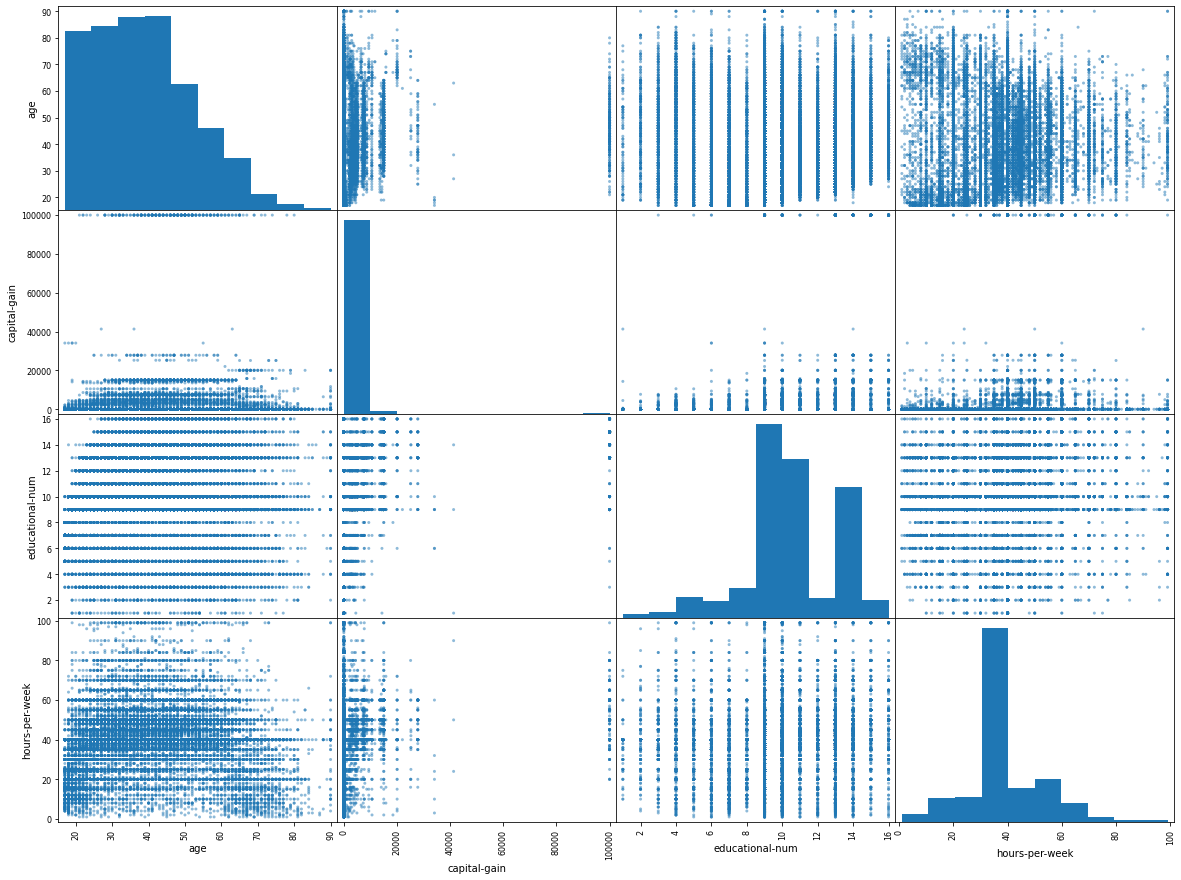

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["age", "capital-gain", "educational-num", "hours-per-week"] 
scatter_matrix(df[attributes], figsize=(20, 15));

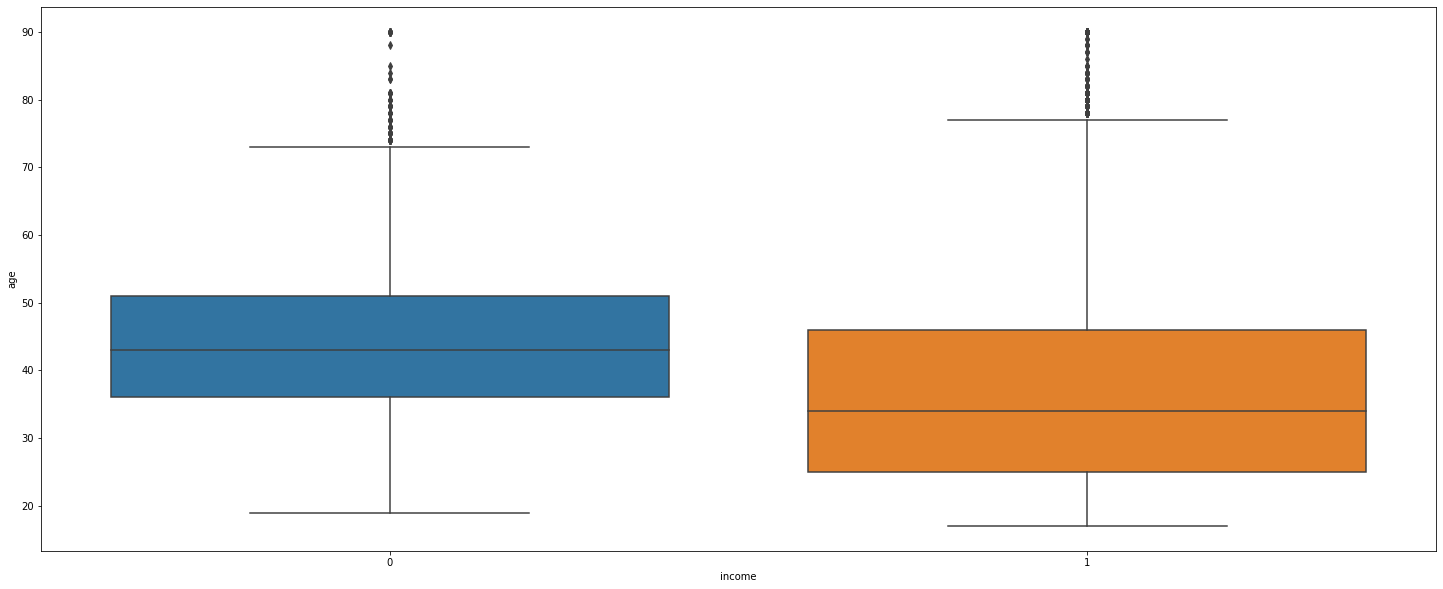

In [20]:
plt.figure(figsize=(25, 10))
sns.boxplot(x="income", y="age", data=df)

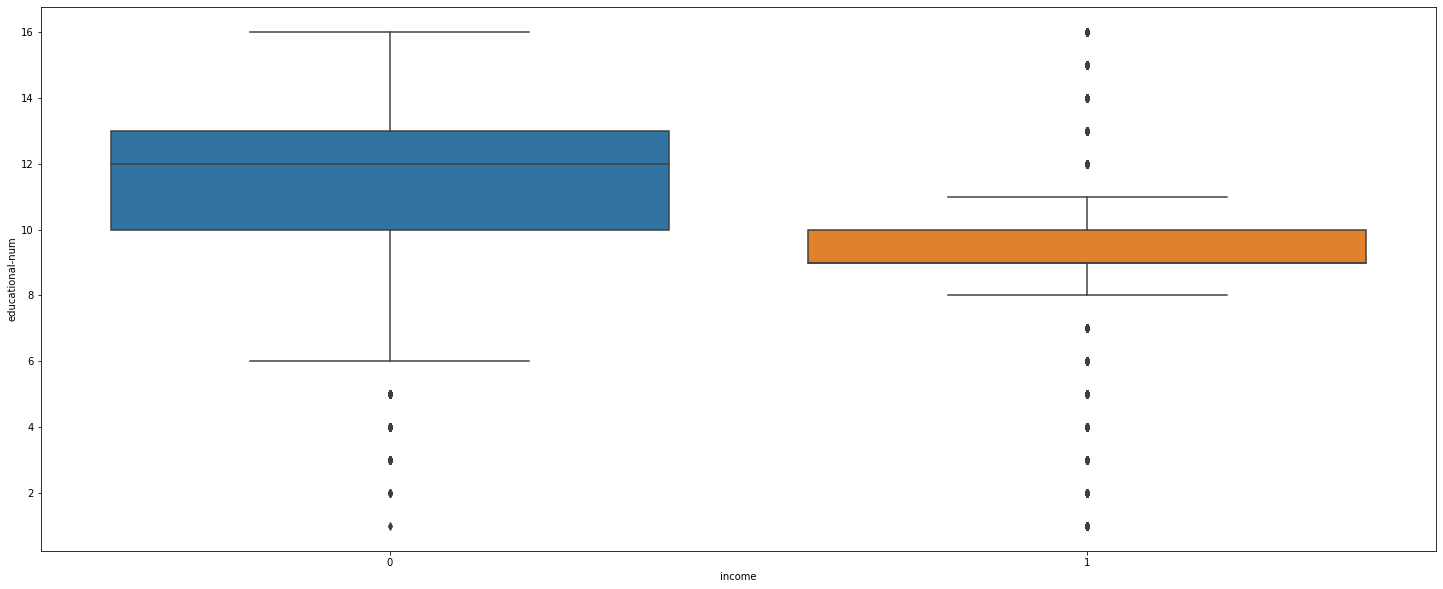

In [21]:
plt.figure(figsize=(25, 10))
sns.boxplot(x="income", y="educational-num", data=df)

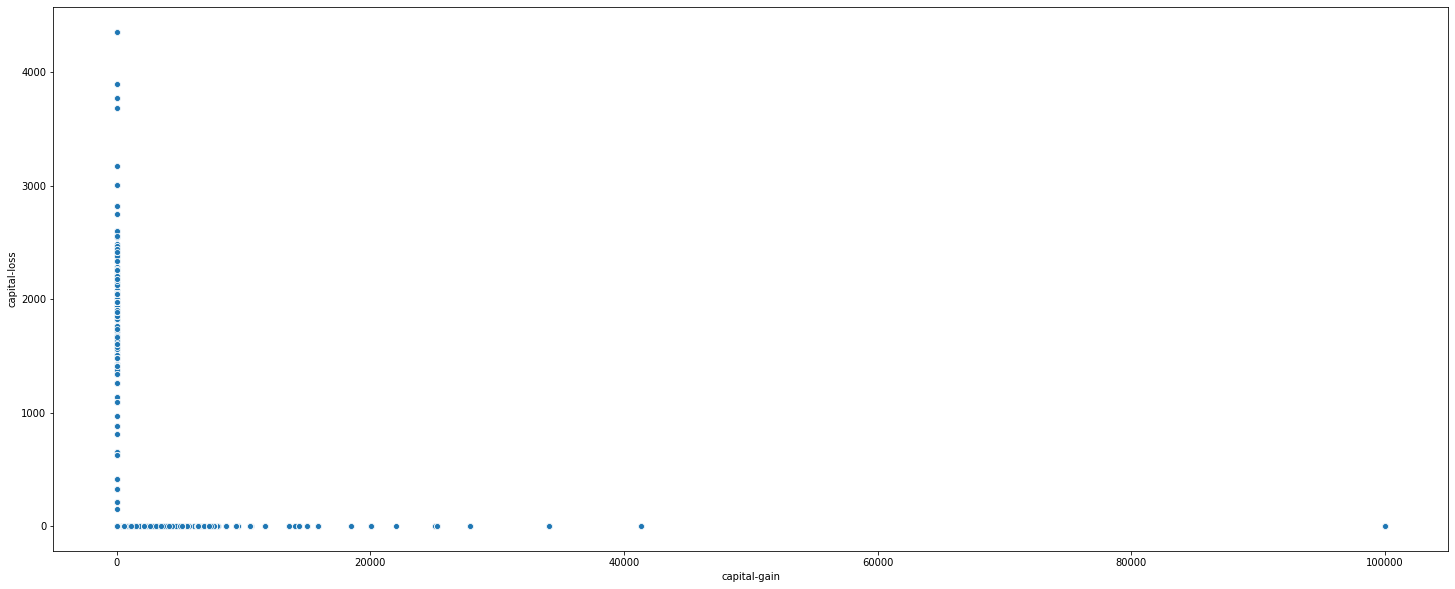

In [22]:
plt.figure(figsize=(25, 10))
sns.scatterplot(x="capital-gain", y="capital-loss", data=df)

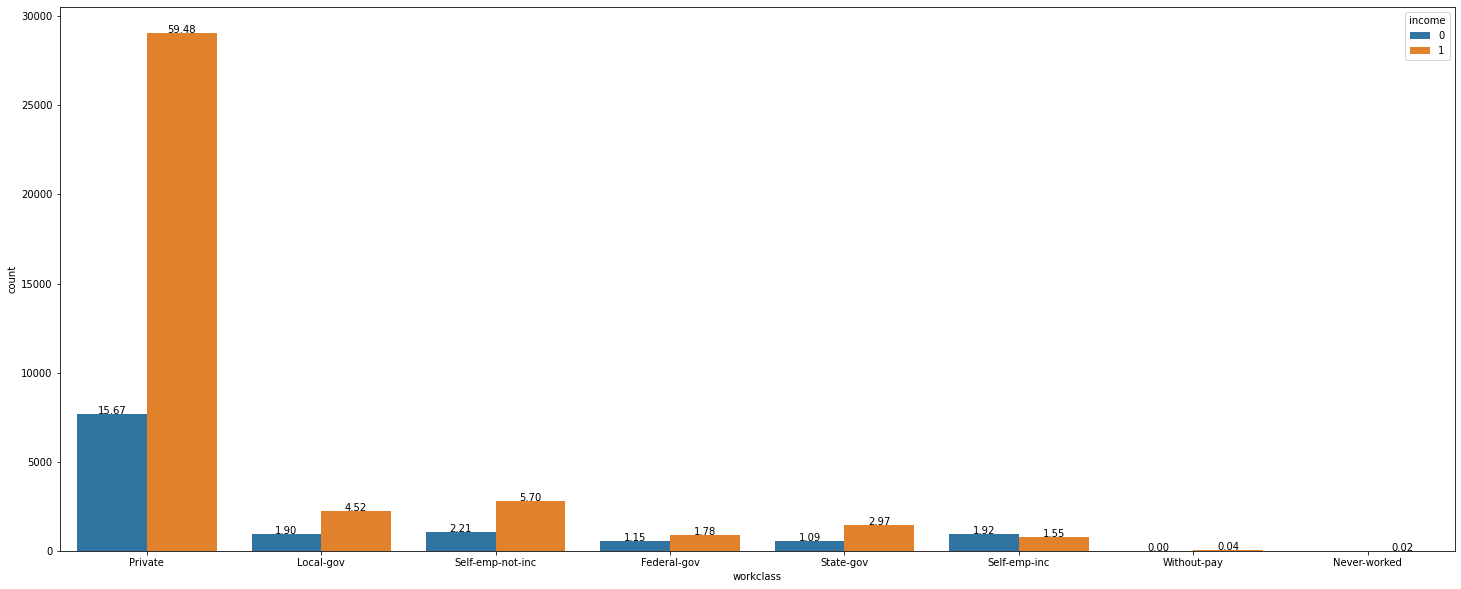

In [23]:
plt.figure(figsize=(25, 10))
total = float(len(df["income"]))
ax = sns.countplot(x="workclass", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

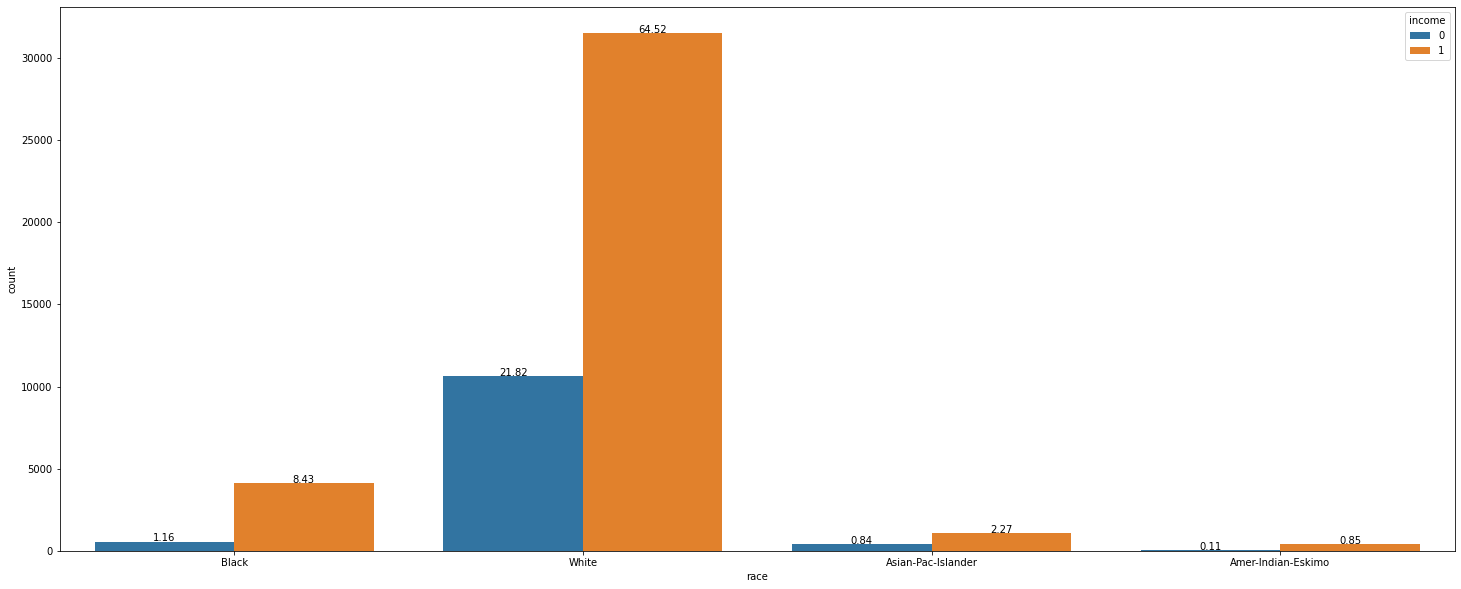

In [24]:
plt.figure(figsize=(25, 10))
total = float(len(df["income"]) )
ax = sns.countplot(x="race", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

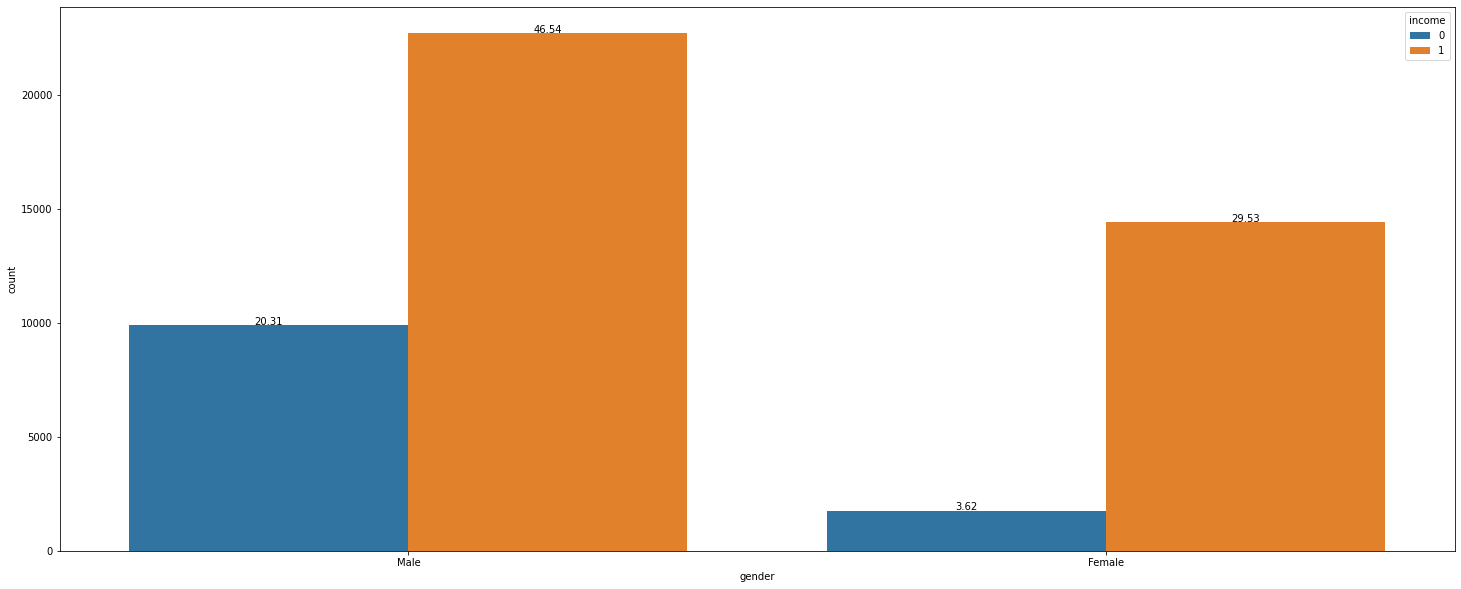

In [25]:
plt.figure(figsize=(25, 10))
total = float(len(df["income"]) )
ax = sns.countplot(x="gender", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

In [26]:
df.gender = [1 if i == "Male" else 0 for i in df.gender]

In [27]:
df['IsPrivate'] = [1 if i == 'Private' else 0 for i in df.workclass]

In [28]:
df['IsWhite'] = [1 if i == 'White' else 0 for i in df.race]

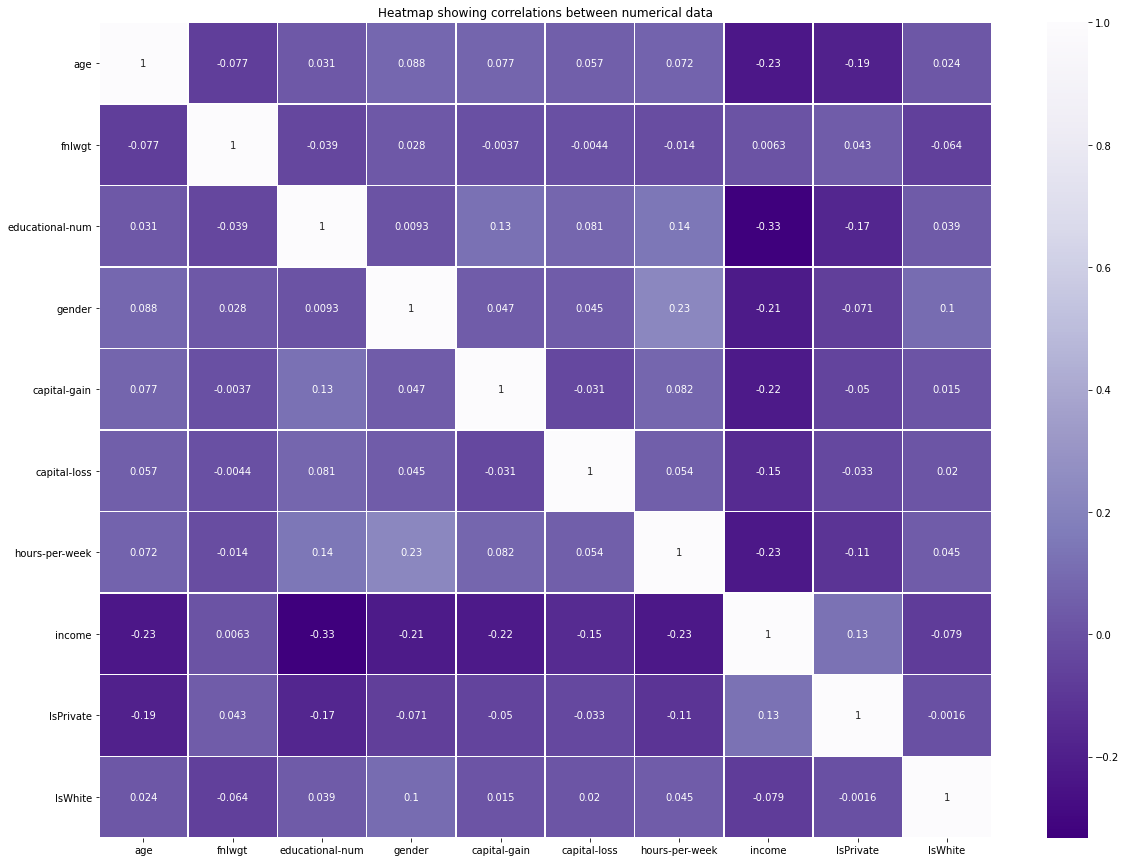

In [29]:
plt.figure(figsize=(20,15))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Purples_r")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [30]:
df = df.drop(columns = ['fnlwgt', 'IsWhite', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'])

In [31]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)
X_train = train_set.drop('income', axis=1)
X_test = test_set.drop('income', axis=1)
Y_train = train_set.income
Y_test = test_set.income

In [32]:
class LogReg:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [33]:
from sklearn.linear_model import LogisticRegression

def fit_predict_show(f, X_train, Y_train, X_test, Y_test):
    f.fit(X_train, Y_train)
    return (f.predict(X_test) == Y_test).mean()

def test_log_reg(X_train, Y_train, X_test, Y_test):
    n_sklrn = fit_predict_show(LogReg(lr=0.1, num_iter=100), X_train, Y_train, X_test, Y_test)
    print("Not sklearn : ", n_sklrn)
    sklrn = fit_predict_show(LogisticRegression(), X_train, Y_train, X_test, Y_test)
    print("Sklearn : ", sklrn)

In [34]:
test_log_reg(X_train, Y_train, X_test, Y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


Not sklearn :  0.7868695830205419
Sklearn :  0.8159421278918992


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
from scipy.spatial import distance

class KNN:
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions

    def closest(self, row):
        best_dist = distance.euclidean(row, self.X_train[0])
        best_index = 0
        for i in range(1, len(self.X_train)):
            dist = distance.euclidean(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
        return self.Y_train[best_index]

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
    
def fit_predict_get_accuracy(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train.values, Y_train.values)
    pred = model.predict(X_test.values)
    return accuracy_score(Y_test.values, pred)

def test_knn(df):
    df_knn = df[df.index  <= 1000]
    train_set, test_set = train_test_split(df_knn, test_size=0.3, random_state=42)
    X_train = train_set.drop('income', axis=1)
    X_test = test_set.drop('income', axis=1)
    Y_train = train_set.income
    Y_test = test_set.income
    
    n_sklrn = fit_predict_get_accuracy(KNN(), X_train, Y_train, X_test, Y_test)
    print("Not sklearn : ", n_sklrn)
    
    sklrn = fit_predict_get_accuracy(KNeighborsClassifier(n_neighbors=1), X_train, Y_train, X_test, Y_test)
    print("Sklearn : ", sklrn)

In [37]:
test_knn(df)

Not sklearn :  0.7142857142857143
Sklearn :  0.7142857142857143


In [38]:
import numpy as np
class DecisionTree(object):
    
    def __init__(self, _max_depth, _min_splits):
        self.max_depth = _max_depth
        self.min_splits = _min_splits

    def fit(self, _feature, _label):
        self.feature = _feature
        self.label = _label
        self.train_data = np.column_stack((self.feature,self.label))
        self.build_tree()


    def compute_gini_similarity(self, groups, class_labels):
        num_sample = sum([len(group) for group in groups])
        gini_score = 0

        for group in groups:
            size = float(len(group))

            if size == 0:
                continue
            score = 0.0
            for label in class_labels:
                porportion = (group[:,-1] == label).sum() / size
                score += porportion * porportion
            gini_score += (1.0 - score) * (size/num_sample)

        return gini_score

    def terminal_node(self, _group):
        class_labels, count = np.unique(_group[:,-1], return_counts= True)
        return class_labels[np.argmax(count)]

    def split(self, index, val, data):
        data_left = np.array([]).reshape(0,self.train_data.shape[1])
        data_right = np.array([]).reshape(0, self.train_data.shape[1])

        for row in data:
            if row[index] <= val :
                data_left = np.vstack((data_left,row))

            if row[index] > val:
                data_right = np.vstack((data_right, row))

        return data_left, data_right

    def best_split(self, data):
        class_labels = np.unique(data[:,-1])
        best_index = 999
        best_val = 999
        best_score = 999
        best_groups = None

        for idx in range(data.shape[1]-1):
            for row in data:
                groups = self.split(idx, row[idx], data)
                gini_score = self.compute_gini_similarity(groups,class_labels)

                if gini_score < best_score:
                    best_index = idx
                    best_val = row[idx]
                    best_score = gini_score
                    best_groups = groups
        result = {}
        result['index'] = best_index
        result['val'] = best_val
        result['groups'] = best_groups
        return result


    def split_branch(self, node, depth):
        left_node , right_node = node['groups']
        del(node['groups'])

        if not isinstance(left_node,np.ndarray) or not isinstance(right_node,np.ndarray):
            node['left'] = self.terminal_node(left_node + right_node)
            node['right'] = self.terminal_node(left_node + right_node)
            return

        if depth >= self.max_depth:
            node['left'] = self.terminal_node(left_node)
            node['right'] = self.terminal_node(right_node)
            return

        if len(left_node) <= self.min_splits:
            node['left'] = self.terminal_node(left_node)
        else:
            node['left'] = self.best_split(left_node)
            self.split_branch(node['left'],depth + 1)


        if len(right_node) <= self.min_splits:
            node['right'] = self.terminal_node(right_node)
        else:
            node['right'] = self.best_split(right_node)
            self.split_branch(node['right'],depth + 1)

    def build_tree(self):
        self.root = self.best_split(self.train_data)
        self.split_branch(self.root, 1)
        return self.root

    def _predict(self, node, row):
        if row[node['index']] < node['val']:
            if isinstance(node['left'], dict):
                return self._predict(node['left'], row)
            else:
                return node['left']

        else:
            if isinstance(node['right'],dict):
                return self._predict(node['right'],row)
            else:
                return node['right']

    def predict(self, test_data):
        self.predicted_label = np.array([])
        for idx in test_data:
            self.predicted_label = np.append(self.predicted_label, self._predict(self.root,idx))

        return self.predicted_label

In [39]:
from sklearn import tree

def test_decision_tree(df):
    df_dt = df[df.index  <= 1000]
    train_set, test_set = train_test_split(df_dt, test_size=0.3, random_state=42)
    X_train = train_set.drop('income', axis=1)
    X_test = test_set.drop('income', axis=1)
    Y_train = train_set.income
    Y_test = test_set.income
    model = DecisionTree(2, 2)
    model.fit(X_train.values, Y_train.values)
    pred = model.predict(X_test.values)
    print("Not sklearn ", accuracy_score(Y_test.values, pred))
    model = tree.DecisionTreeClassifier()
    model.fit(X_train.values, Y_train.values)
    pred = model.predict(X_test.values)
    print("Sklearn ", accuracy_score(Y_test.values, pred))

In [40]:
test_decision_tree(df)

Not sklearn  0.7840531561461794
Sklearn  0.7408637873754153


In [48]:
a = np.sqrt

In [74]:
import numpy as np
from scipy.stats import mode
from sklearn import tree



class RF(object):

    def __init__(self, n_estimators=32, max_features=8, max_depth=10,
        min_samples_split=2, bootstrap=0.9):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.bootstrap = bootstrap
        self.forest = []


    def fit(self, X, y):
        self.forest = []
        n_samples = len(y)
        n_sub_samples = round(n_samples*self.bootstrap)
        
        for i in range(self.n_estimators):
            X_subset = X[:n_sub_samples]
            y_subset = y[:n_sub_samples]

            tree_ = tree.DecisionTreeClassifier()
            tree_.fit(X_subset, y_subset)
            self.forest.append(tree_)


    def predict(self, X):
        n_samples = X.shape[0]
        n_trees = len(self.forest)
        predictions = np.empty([n_trees, n_samples])
        for i in range(n_trees):
            predictions[i] = self.forest[i].predict(X)

        return mode(predictions)[0][0]


    def score(self, X, y):
        y_predict = self.predict(X)
        n_samples = len(y)
        correct = 0
        for i in xrange(n_samples):
            if y_predict[i] == y[i]:
                correct = correct + 1
        accuracy = correct/n_samples
        return accuracy

In [76]:
from sklearn.ensemble import RandomForestClassifier

def test_rf(df):
    df_dt = df[df.index  <= 1000]
    train_set, test_set = train_test_split(df_dt, test_size=0.3, random_state=42)
    X_train = train_set.drop('income', axis=1)
    X_test = test_set.drop('income', axis=1)
    Y_train = train_set.income
    Y_test = test_set.income
    model = RF()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    print("Not sklearn ", accuracy_score(Y_test, pred))
    model = RandomForestClassifier()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    print("Sklearn ", accuracy_score(Y_test, pred))

In [77]:
test_rf(df)

Not sklearn  0.7408637873754153
Sklearn  0.7641196013289037
